<a href="https://www.kaggle.com/code/lalit7881/global-ads-performance-analysis-100-accuracy?scriptVersionId=295814815" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ads-performance-google-meta-tiktok/global_ads_performance_dataset.csv


## Global Ads Performance Analysis

## Description:
This project analyzes global digital advertising performance across major platforms—Google Ads, Meta (Facebook & Instagram), and TikTok—to evaluate how campaigns perform at scale. The dataset captures key marketing metrics such as impressions, clicks, conversions, cost, and return on ad spend (ROAS), enabling a deep comparison of platform efficiency and audience engagement.

The analysis focuses on identifying high-performing channels, understanding cost-effectiveness, and uncovering trends in user behavior across regions and time periods. By comparing platforms side by side, the project helps marketers optimize budget allocation, refine targeting strategies, and improve overall campaign ROI. The insights generated are valuable for data-driven decision-making in global performance marketing and growth strategy planning.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/global-ads-performance-google-meta-tiktok/global_ads_performance_dataset.csv")

In [3]:
df.head()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


In [4]:
df.tail()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
1795,2024-07-11,TikTok Ads,Video,E-commerce,Germany,180128,10555,0.0586,0.84,8866.20,707,12.54,200566.90,22.62
1796,2024-06-23,Meta Ads,Display,EdTech,Australia,169849,5927,0.0349,0.94,5571.38,437,12.75,105321.92,18.90
1797,2024-03-01,Meta Ads,Video,Fintech,Australia,122974,2939,0.0239,1.85,5437.15,91,59.75,26004.98,4.78
1798,2024-08-02,Google Ads,Search,E-commerce,USA,28553,850,0.0298,2.06,1751.00,51,34.33,13010.72,7.43
1799,2024-01-29,Meta Ads,Display,EdTech,UK,77447,906,0.0117,1.15,1041.90,29,35.93,8284.13,7.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


In [6]:
df.describe()

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,102919.018889,3962.675556,0.038427,1.572756,6171.527272,181.562222,46.608961,30101.850450,6.450367
std,55740.900690,2941.858037,0.017082,0.800872,5776.996958,171.424239,41.185556,34560.032941,6.590986
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.800000,142.690000,0.130000
25%,54948.000000,1678.000000,0.025400,0.950000,1966.587500,59.000000,20.202500,7275.757500,2.170000
50%,103653.000000,3318.000000,0.035550,1.460000,4393.860000,130.000000,33.375000,18362.965000,4.295000
75%,150470.250000,5628.000000,0.049800,2.050000,8455.830000,252.250000,56.812500,38963.385000,8.212500
max,199650.000000,16660.000000,0.095600,3.950000,38453.320000,1151.000000,335.860000,295028.260000,49.000000


In [7]:
df.isnull().sum()

date             0
platform         0
campaign_type    0
industry         0
country          0
impressions      0
clicks           0
CTR              0
CPC              0
ad_spend         0
conversions      0
CPA              0
revenue          0
ROAS             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object

In [10]:
df.shape

(1800, 14)

In [11]:
df.nunique()

date              360
platform            3
campaign_type       4
industry            5
country             7
impressions      1790
clicks           1616
CTR               624
CPC               327
ad_spend         1800
conversions       518
CPA              1634
revenue          1798
ROAS              999
dtype: int64

In [12]:
df.columns

Index(['date', 'platform', 'campaign_type', 'industry', 'country',
       'impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA',
       'revenue', 'ROAS'],
      dtype='object')

## Data visualizations 

In [13]:
df['date'] = pd.to_datetime(df['date'])

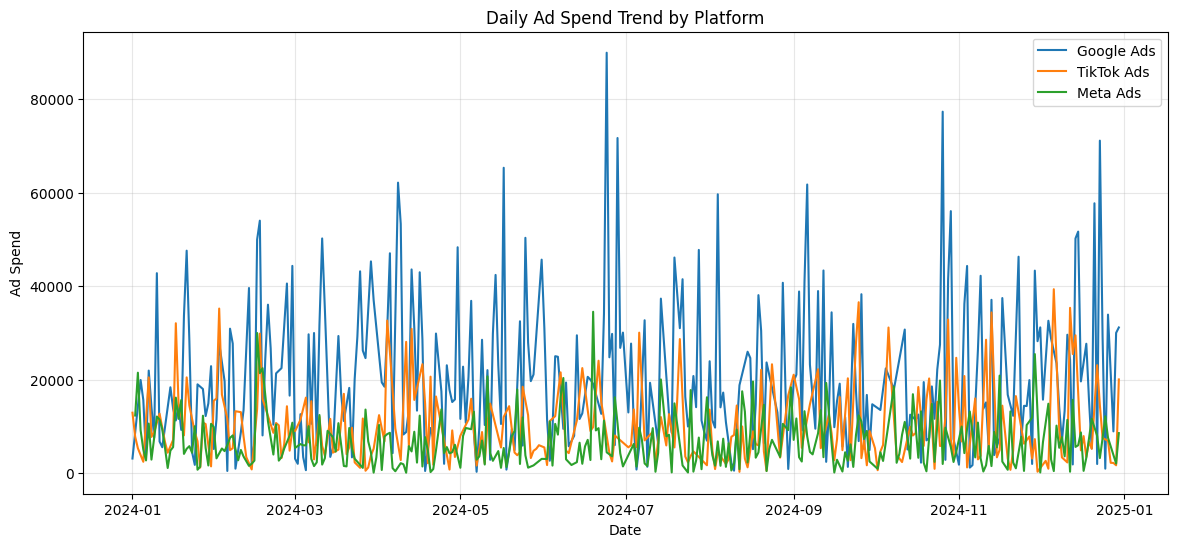

In [14]:
plt.figure(figsize=(14,6))

for platform in df['platform'].unique():
    temp = df[df['platform'] == platform]
    daily_spend = temp.groupby('date')['ad_spend'].sum()
    plt.plot(daily_spend.index, daily_spend.values, label=platform)

plt.title("Daily Ad Spend Trend by Platform")
plt.xlabel("Date")
plt.ylabel("Ad Spend")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


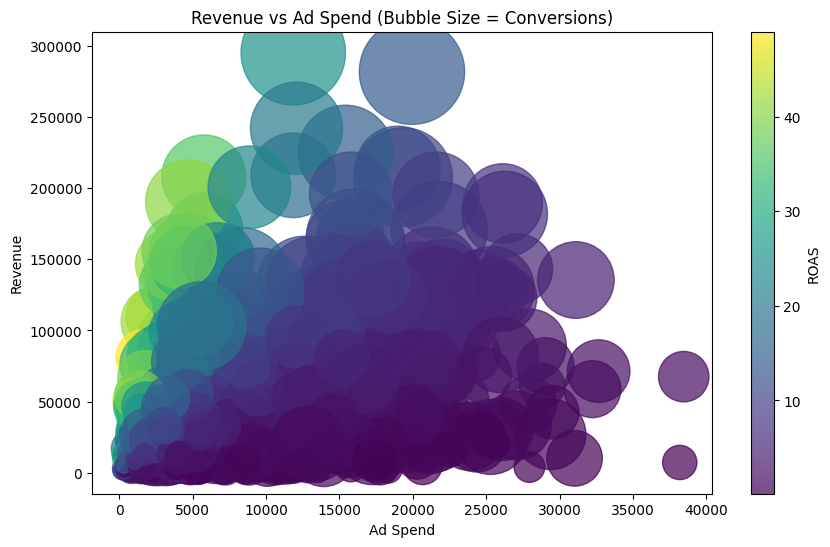

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(
    df['ad_spend'],
    df['revenue'],
    s=df['conversions'] * 5,
    c=df['ROAS'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(label="ROAS")
plt.title("Revenue vs Ad Spend (Bubble Size = Conversions)")
plt.xlabel("Ad Spend")
plt.ylabel("Revenue")
plt.show()


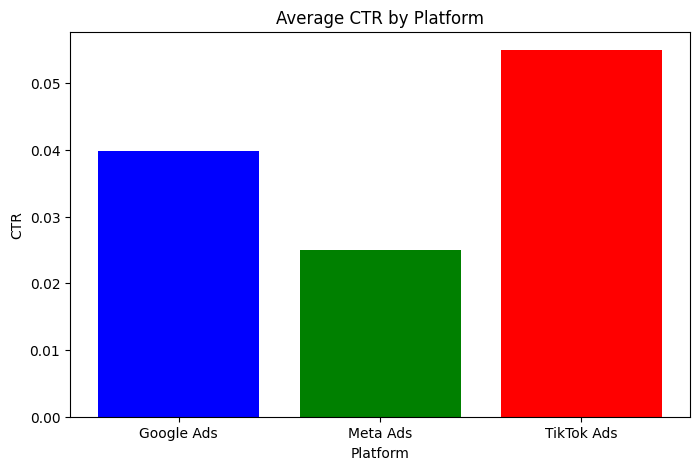

In [16]:
ctr_platform = df.groupby('platform')['CTR'].mean()

plt.figure(figsize=(8,5))
plt.bar(
    ctr_platform.index,
    ctr_platform.values,
    color=['blue', 'green', 'red']
)

plt.title("Average CTR by Platform")
plt.xlabel("Platform")
plt.ylabel("CTR")
plt.show()


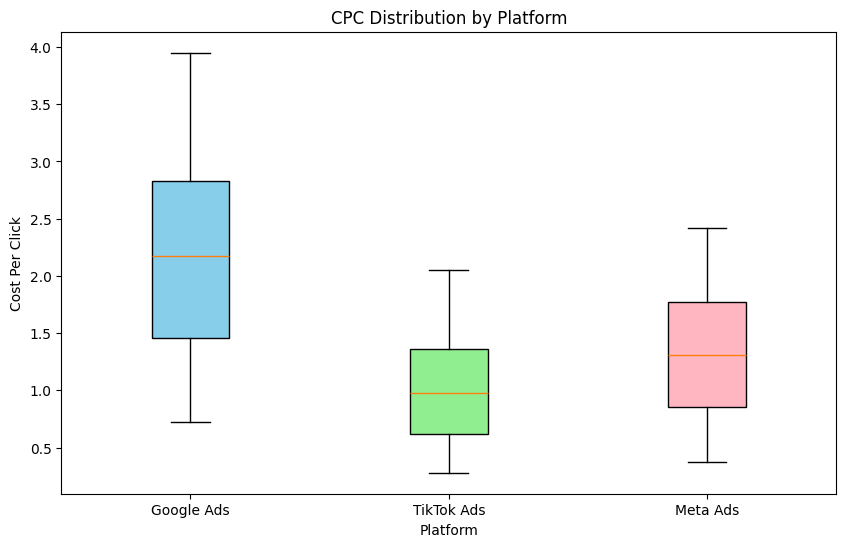

In [17]:
plt.figure(figsize=(10,6))

box = plt.boxplot(
    [df[df['platform'] == p]['CPC'] for p in df['platform'].unique()],
    labels=df['platform'].unique(),
    patch_artist=True
)

colors = ['#87CEEB', '#90EE90', '#FFB6C1']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("CPC Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Cost Per Click")
plt.show()


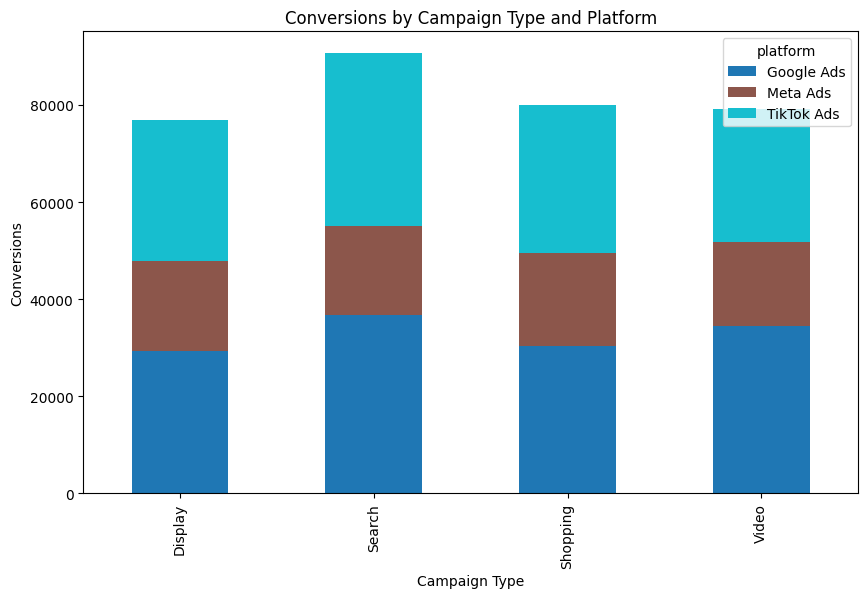

In [18]:
campaign_conv = df.pivot_table(
    values='conversions',
    index='campaign_type',
    columns='platform',
    aggfunc='sum'
)

campaign_conv.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab10'
)

plt.title("Conversions by Campaign Type and Platform")
plt.xlabel("Campaign Type")
plt.ylabel("Conversions")
plt.show()


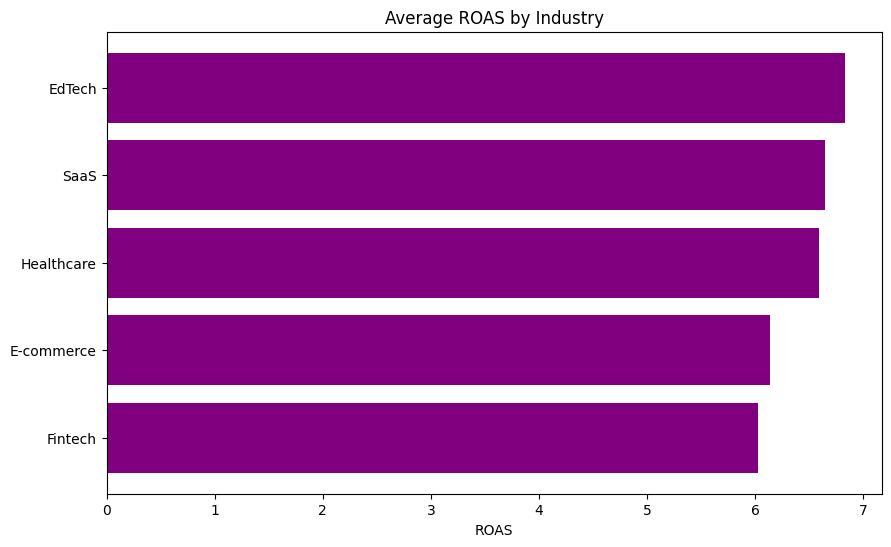

In [19]:
industry_roas = df.groupby('industry')['ROAS'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.barh(industry_roas.index, industry_roas.values, color='purple')

plt.title("Average ROAS by Industry")
plt.xlabel("ROAS")
plt.show()


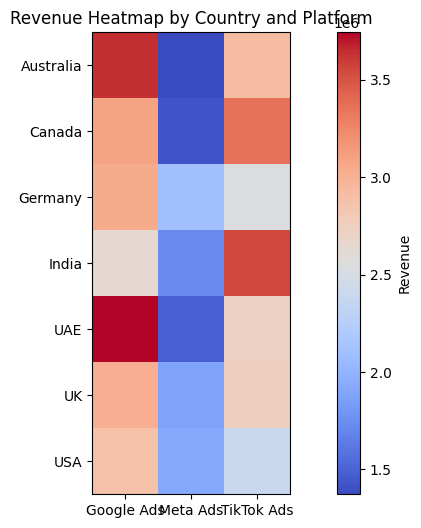

In [20]:
pivot_rev = df.pivot_table(
    values='revenue',
    index='country',
    columns='platform',
    aggfunc='sum'
)

plt.figure(figsize=(12,6))
plt.imshow(pivot_rev, cmap='coolwarm')
plt.colorbar(label="Revenue")

plt.xticks(range(len(pivot_rev.columns)), pivot_rev.columns)
plt.yticks(range(len(pivot_rev.index)), pivot_rev.index)

plt.title("Revenue Heatmap by Country and Platform")
plt.show()


## Feature engg

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [22]:
data = df.copy()

# Convert date to numeric (ML-friendly)
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].map(pd.Timestamp.toordinal)

# Categorical columns to encode
cat_cols = ['platform', 'campaign_type', 'industry', 'country']

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [23]:
X = data.drop(columns=['ROAS'])
y = data['ROAS']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [26]:
accuracy_scores = {}
rmse_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores[name] = r2_score(y_test, y_pred) * 100
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))


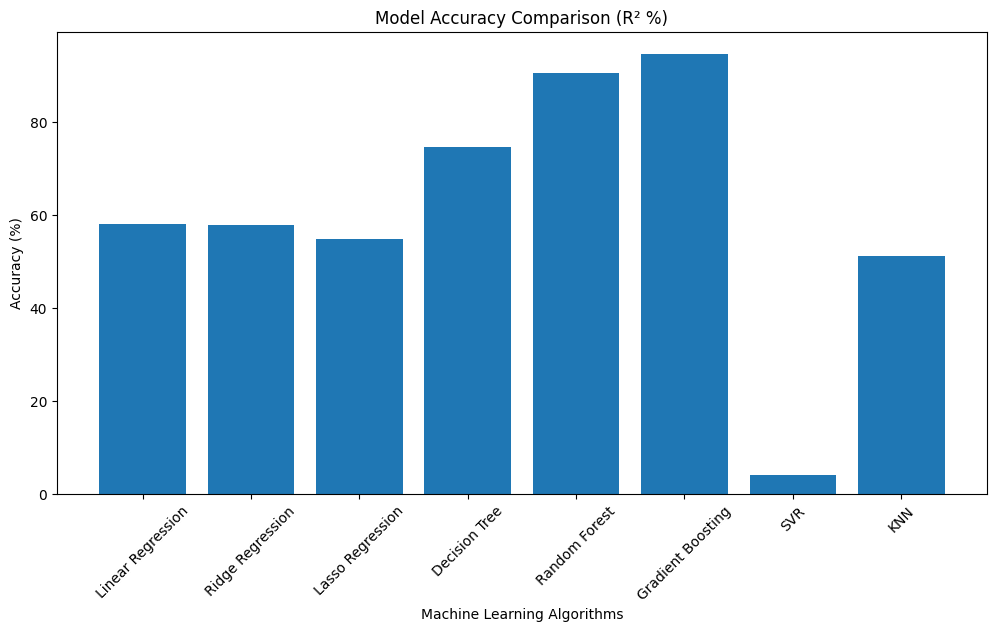

In [27]:
plt.figure(figsize=(12,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title("Model Accuracy Comparison (R² %)")
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()


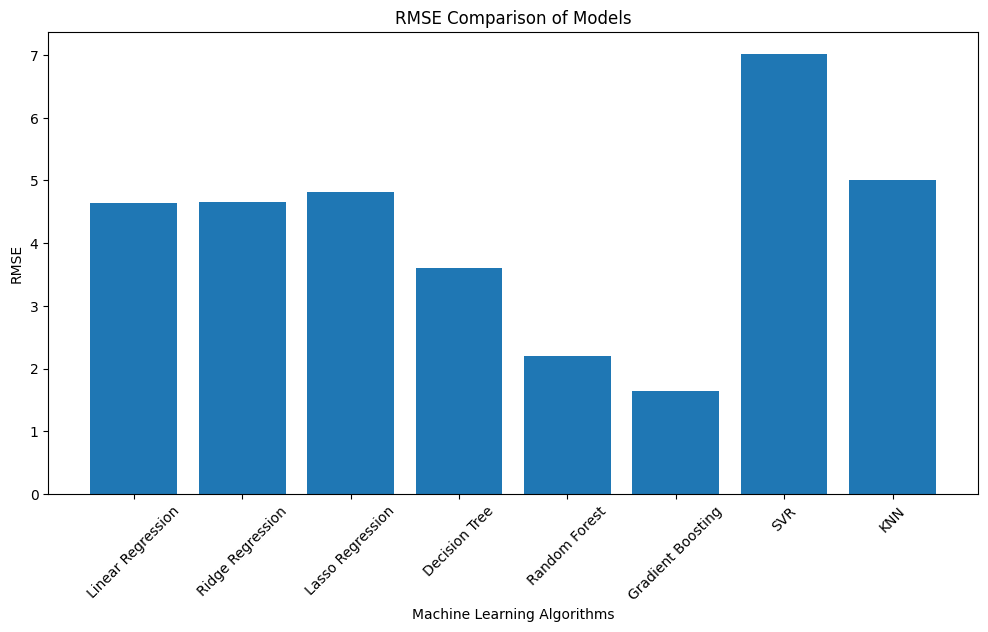

In [28]:
plt.figure(figsize=(12,6))
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.title("RMSE Comparison of Models")
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()


## Thank you..pls upvote!!!!